# Reconhecimento da face, detecção de landmarks e classificação

## 1. Importar Bibliotecas


In [ ]:
import cv2
import mediapipe as mp
import os
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

print("✓ Bibliotecas importadas com sucesso!")


✓ Bibliotecas importadas com sucesso!


## 2. Inicializar MediaPipe Face Mesh


In [4]:
# Inicializar o detector de faces
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    min_detection_confidence=0.5
)

print("✓ Detector de faces inicializado!")


✓ Detector de faces inicializado!


I0000 00:00:1759962864.784090    7773 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-20.7.3), renderer: Intel(R) Iris(TM) Plus Graphics 640
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1759962864.798818   16045 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


W0000 00:00:1759962864.856592   16043 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


## 3. PASSO 1: Carregar e Verificar Detecção de Faces

Vamos verificar se conseguimos detectar faces em cada imagem da pasta `imagens_face/`


In [19]:
# Pasta com as imagens
pasta_imagens = "imagens_face"

# Listar todas as imagens
imagens = [f for f in os.listdir(pasta_imagens) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print(f"Encontradas {len(imagens)} imagens na pasta '{pasta_imagens}':")
for img in imagens:
    print(f"  - {img}")


Encontradas 5 imagens na pasta 'imagens_face':
  - nao_rosto.jpeg
  - rosto_quadrado.jpeg
  - rosto_triangular.jpeg
  - rosto_oval.jpeg
  - rosto_redondo.jpeg


### Verificar Detecção de Faces

Para cada imagem, vamos tentar detectar a face e retornar **Sim** ou **Não**.


In [21]:
# Dicionário para armazenar resultados
resultados_deteccao = {}

print("\n" + "="*60)
print("VERIFICAÇÃO DE DETECÇÃO DE FACES")
print("="*60 + "\n")

for nome_imagem in imagens:
    # Caminho completo da imagem
    caminho_imagem = os.path.join(pasta_imagens, nome_imagem)
    
    # Carregar imagem
    imagem = cv2.imread(caminho_imagem)
    
    if imagem is None:
        print(f"❌ {nome_imagem}: Erro ao carregar imagem")
        resultados_deteccao[nome_imagem] = "Não"
        continue
    
    # Converter BGR para RGB (MediaPipe usa RGB)
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    
    # Tentar detectar face
    resultados = face_mesh.process(imagem_rgb)
    
    # Verificar se face foi detectada
    if resultados.multi_face_landmarks:
        print(f"✅ {nome_imagem}: Sim - Face detectada!")
        resultados_deteccao[nome_imagem] = "Sim"
    else:
        print(f"❌ {nome_imagem}: Não - Face não detectada")
        resultados_deteccao[nome_imagem] = "Não"

print("\n" + "="*60)
print("RESUMO")
print("="*60)
print(f"\nTotal de imagens: {len(imagens)}")
print(f"Faces detectadas: {sum(1 for v in resultados_deteccao.values() if v == 'Sim')}")
print(f"Faces não detectadas: {sum(1 for v in resultados_deteccao.values() if v == 'Não')}")



VERIFICAÇÃO DE DETECÇÃO DE FACES

❌ nao_rosto.jpeg: Não - Face não detectada
✅ rosto_quadrado.jpeg: Sim - Face detectada!
✅ rosto_triangular.jpeg: Sim - Face detectada!
✅ rosto_oval.jpeg: Sim - Face detectada!
✅ rosto_redondo.jpeg: Sim - Face detectada!

RESUMO

Total de imagens: 5
Faces detectadas: 4
Faces não detectadas: 1


### Visualizar as Imagens e Resultados


/var/folders/94/l19vqryd2y35j23b2gdcx0hw0000gn/T/ipykernel_1002/2367689583.py:26: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/94/l19vqryd2y35j23b2gdcx0hw0000gn/T/ipykernel_1002/2367689583.py:26: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


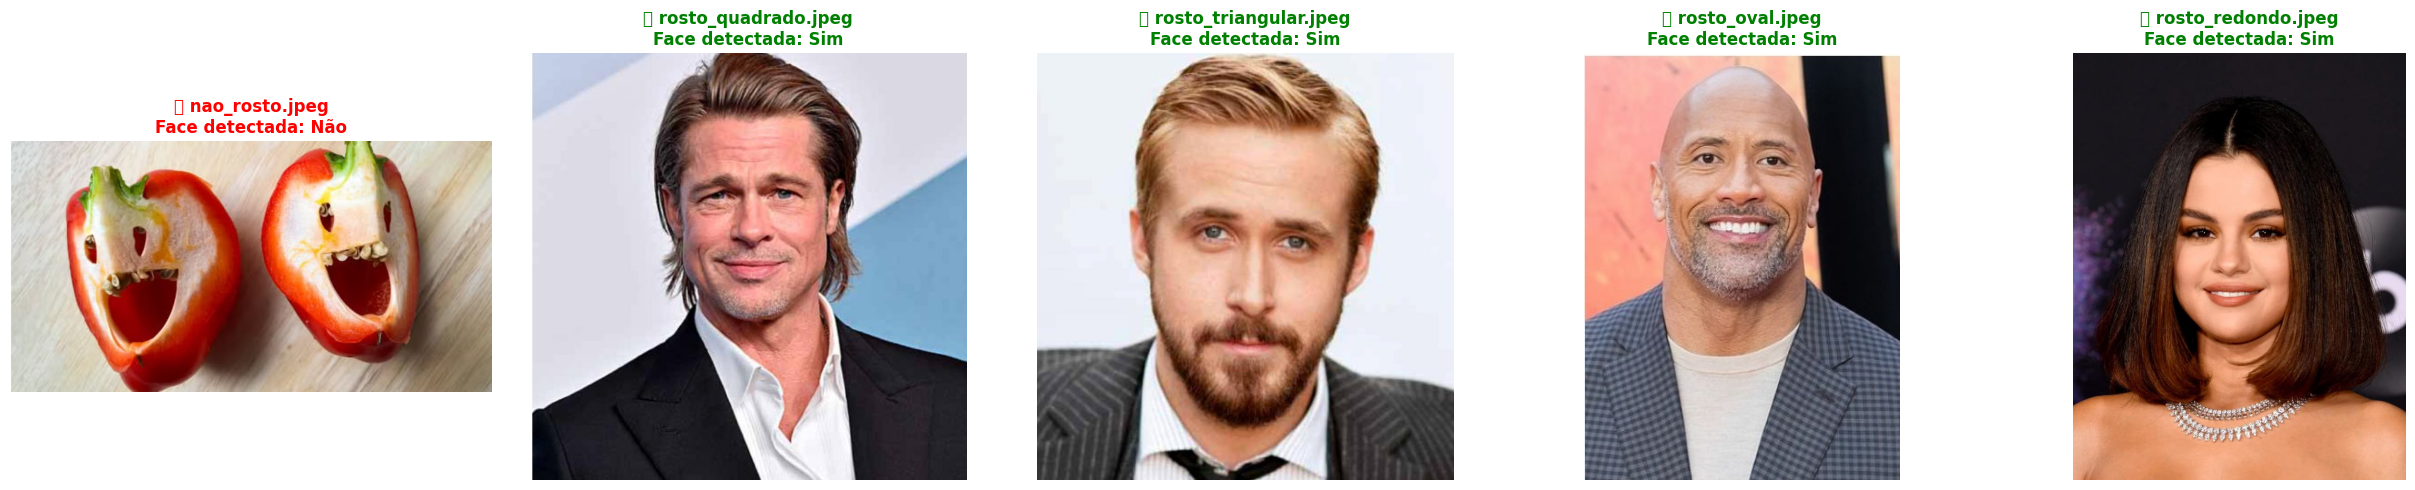

In [22]:
# Visualizar as imagens com indicação de detecção
num_imagens = len(imagens)
fig, axes = plt.subplots(1, num_imagens, figsize=(5*num_imagens, 5))

# Caso tenha apenas uma imagem, axes não será um array
if num_imagens == 1:
    axes = [axes]

for idx, nome_imagem in enumerate(imagens):
    caminho_imagem = os.path.join(pasta_imagens, nome_imagem)
    imagem = cv2.imread(caminho_imagem)
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    
    # Mostrar imagem
    axes[idx].imshow(imagem_rgb)
    
    # Título com resultado
    resultado = resultados_deteccao[nome_imagem]
    cor = 'green' if resultado == "Sim" else 'red'
    simbolo = '✅' if resultado == "Sim" else '❌'
    
    axes[idx].set_title(f"{simbolo} {nome_imagem}\nFace detectada: {resultado}", 
                       fontsize=12, fontweight='bold', color=cor)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


---

## 4. PASSO 2: Visualizar Landmarks nas Faces Detectadas

**Agora que validamos quais imagens têm faces detectadas, vamos extrair e visualizar os landmarks.**


In [8]:
# Filtrar apenas imagens com faces detectadas
imagens_com_face = [img for img, resultado in resultados_deteccao.items() if resultado == "Sim"]

if len(imagens_com_face) == 0:
    print("⚠️ Nenhuma face foi detectada. Não é possível prosseguir com a detecção de landmarks.")
else:
    print(f"✓ {len(imagens_com_face)} imagem(ns) com face detectada.")
    print("Podemos prosseguir com a detecção de landmarks!\n")
    
    for img in imagens_com_face:
        print(f"  - {img}")


✓ 4 imagem(ns) com face detectada.
Podemos prosseguir com a detecção de landmarks!

  - rosto_quadrado.jpeg
  - rosto_triangular.jpeg
  - rosto_oval.jpeg
  - rosto_redondo.jpeg


### Desenhar Landmarks nas Faces



Processando: rosto_quadrado.jpeg
✓ Total de landmarks detectados: 468
✓ Mostrando apenas 36 pontos do contorno do rosto


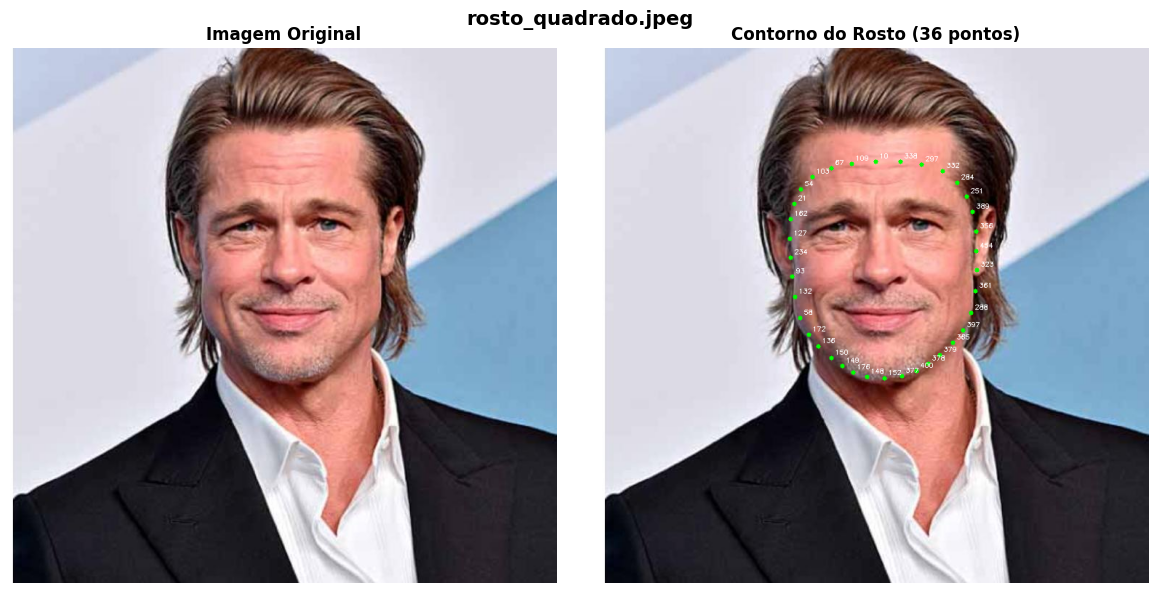

✓ Pontos do contorno desenhados com sucesso!

Processando: rosto_triangular.jpeg
✓ Total de landmarks detectados: 468
✓ Mostrando apenas 36 pontos do contorno do rosto


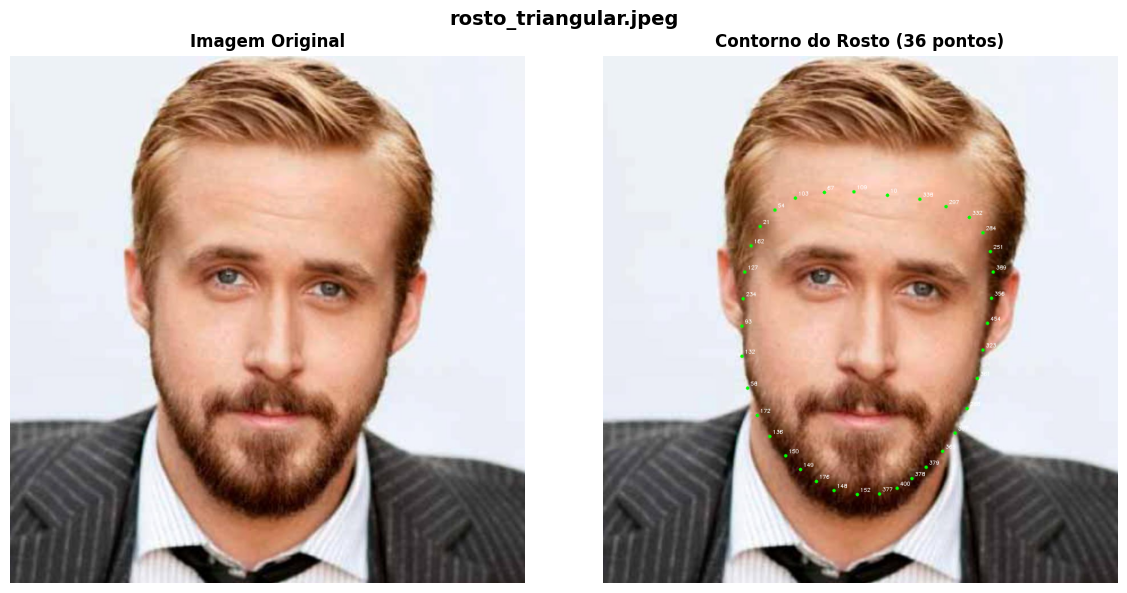

✓ Pontos do contorno desenhados com sucesso!

Processando: rosto_oval.jpeg
✓ Total de landmarks detectados: 468
✓ Mostrando apenas 36 pontos do contorno do rosto


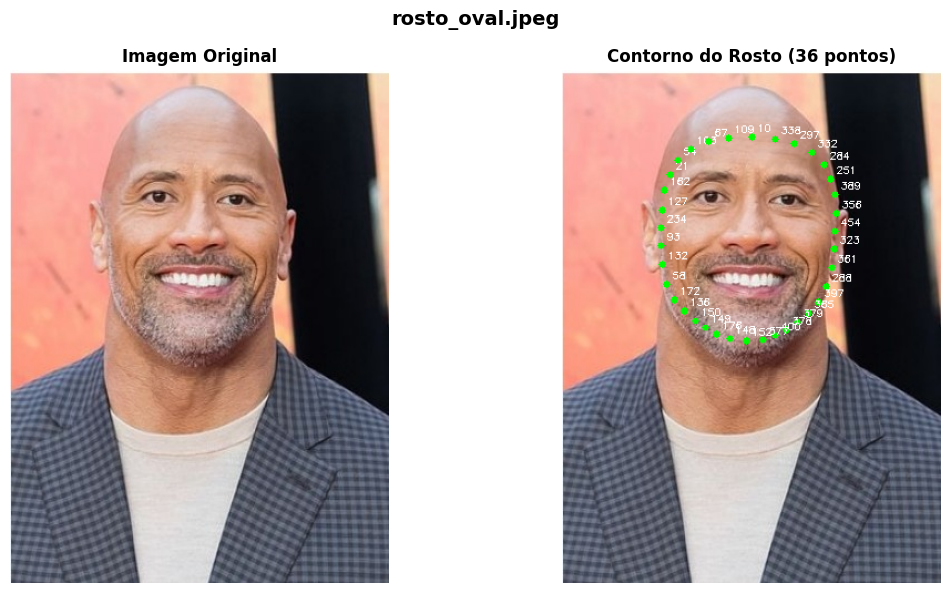

✓ Pontos do contorno desenhados com sucesso!

Processando: rosto_redondo.jpeg
✓ Total de landmarks detectados: 468
✓ Mostrando apenas 36 pontos do contorno do rosto


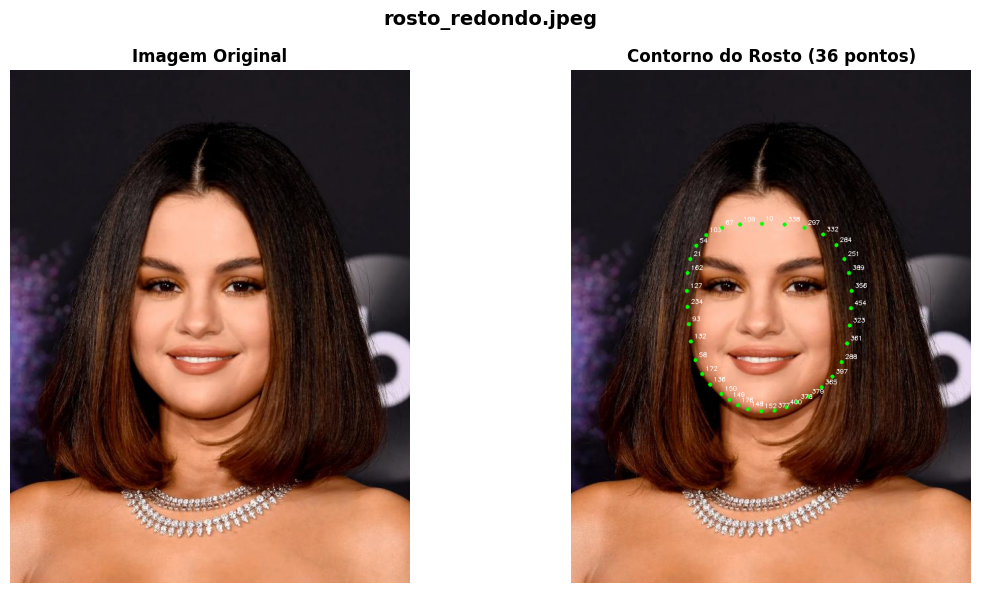

✓ Pontos do contorno desenhados com sucesso!


In [26]:
if len(imagens_com_face) > 0:
    # Pontos do contorno do rosto
    pontos_contorno = [10, 338, 297, 332, 284, 251, 389, 356, 454, 323, 361, 288, 
                       397, 365, 379, 378, 400, 377, 152, 148, 176, 149, 150, 136, 
                       172, 58, 132, 93, 234, 127, 162, 21, 54, 103, 67, 109]
    
    # Processar cada imagem com face detectada
    for nome_imagem in imagens_com_face:
        print(f"\n{'='*60}")
        print(f"Processando: {nome_imagem}")
        print('='*60)
        
        caminho_imagem = os.path.join(pasta_imagens, nome_imagem)
        imagem = cv2.imread(caminho_imagem)
        imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
        h, w = imagem.shape[:2]
        
        # Detectar landmarks
        resultados = face_mesh.process(imagem_rgb)
        
        # Criar cópia para desenhar
        imagem_com_landmarks = imagem.copy()
        
        if resultados.multi_face_landmarks:
            face_landmarks = resultados.multi_face_landmarks[0]
            
            # Informações sobre landmarks
            print(f"✓ Total de landmarks detectados: {len(face_landmarks.landmark)}")
            print(f"✓ Mostrando apenas {len(pontos_contorno)} pontos do contorno do rosto")
            
            # Desenhar apenas os pontos do contorno com numeração
            for idx in pontos_contorno:
                landmark = face_landmarks.landmark[idx]
                
                # Coordenadas do landmark
                x = int(landmark.x * w)
                y = int(landmark.y * h)
                
                # Desenhar ponto (círculo)
                cv2.circle(imagem_com_landmarks, (x, y), 3, (0, 255, 0), -1)
                
                # Adicionar numeração em todos os pontos do contorno
                cv2.putText(imagem_com_landmarks, str(idx), 
                           (x + 5, y - 5),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1)
            
            # Visualizar lado a lado
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
            
            # Imagem original
            axes[0].imshow(imagem_rgb)
            axes[0].set_title('Imagem Original', fontsize=12, fontweight='bold')
            axes[0].axis('off')
            
            # Imagem com landmarks do contorno numerados
            axes[1].imshow(cv2.cvtColor(imagem_com_landmarks, cv2.COLOR_BGR2RGB))
            axes[1].set_title(f'Contorno do Rosto ({len(pontos_contorno)} pontos)', 
                             fontsize=12, fontweight='bold')
            axes[1].axis('off')
            
            plt.suptitle(nome_imagem, fontsize=14, fontweight='bold', y=0.98)
            plt.tight_layout()
            plt.show()
            
            print(f"✓ Pontos do contorno desenhados com sucesso!")
        else:
            print(f"⚠️ Erro ao processar landmarks para {nome_imagem}")


---

## 6. PASSO 3: Extrair Landmarks Específicos

Vamos extrair os landmarks de regiões específicas: olhos, sobrancelhas, nariz, boca e contorno do rosto.


Analisando detalhadamente: rosto_quadrado.jpeg

Landmarks por região:

  Olho Esquerdo: 12 pontos
  Olho Direito: 12 pontos
  Sobrancelha Esquerda: 10 pontos
  Sobrancelha Direita: 10 pontos
  Nariz: 11 pontos
  Boca: 16 pontos
  Contorno Rosto: 36 pontos


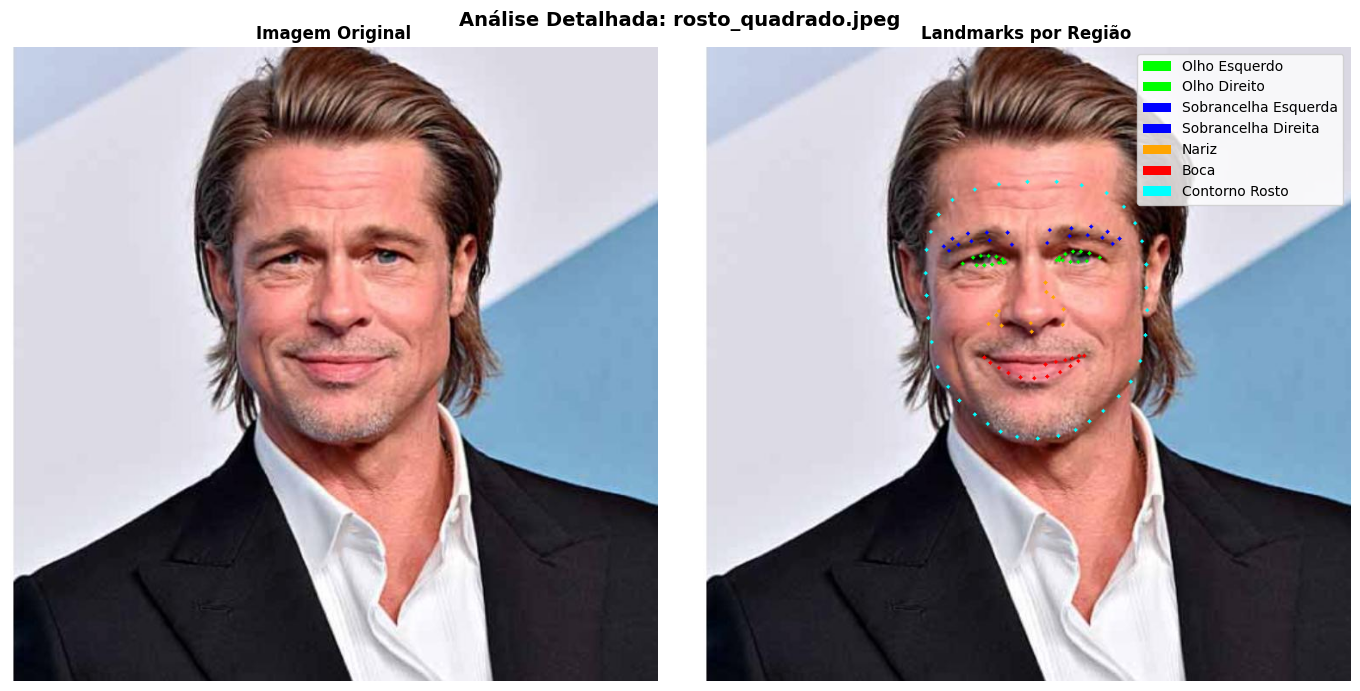

In [27]:
if len(imagens_com_face) > 0:
    # Selecionar a primeira imagem para análise detalhada
    imagem_exemplo = imagens_com_face[0]
    print(f"Analisando detalhadamente: {imagem_exemplo}\n")
    
    caminho = os.path.join(pasta_imagens, imagem_exemplo)
    imagem = cv2.imread(caminho)
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    h, w = imagem.shape[:2]
    
    # Detectar landmarks
    resultados = face_mesh.process(imagem_rgb)
    
    if resultados.multi_face_landmarks:
        face_landmarks = resultados.multi_face_landmarks[0]
        
        # Índices dos landmarks importantes
        landmarks_importantes = {
            'Olho Esquerdo': [33, 133, 160, 159, 158, 157, 173, 144, 145, 153, 154, 155],
            'Olho Direito': [362, 263, 387, 386, 385, 384, 398, 373, 374, 380, 381, 382],
            'Sobrancelha Esquerda': [70, 63, 105, 66, 107, 55, 65, 52, 53, 46],
            'Sobrancelha Direita': [336, 296, 334, 293, 300, 285, 295, 282, 283, 276],
            'Nariz': [1, 2, 98, 327, 129, 203, 49, 279, 420, 399, 456],
            'Boca': [61, 146, 91, 181, 84, 17, 314, 405, 321, 375, 291, 308, 324, 318, 402, 317],
            'Contorno Rosto': [10, 338, 297, 332, 284, 251, 389, 356, 454, 323, 361, 288, 397, 365, 379, 378, 400, 377, 152, 148, 176, 149, 150, 136, 172, 58, 132, 93, 234, 127, 162, 21, 54, 103, 67, 109]
        }
        
        # Cores para cada região
        cores = {
            'Olho Esquerdo': (0, 255, 0),
            'Olho Direito': (0, 255, 0),
            'Sobrancelha Esquerda': (255, 0, 0),
            'Sobrancelha Direita': (255, 0, 0),
            'Nariz': (0, 165, 255),
            'Boca': (0, 0, 255),
            'Contorno Rosto': (255, 255, 0)
        }
        
        # Criar imagem para desenhar landmarks específicos
        imagem_especifica = imagem.copy()
        
        # Desenhar cada região
        print("Landmarks por região:\n")
        for regiao, indices in landmarks_importantes.items():
            cor = cores[regiao]
            print(f"  {regiao}: {len(indices)} pontos")
            
            for idx in indices:
                landmark = face_landmarks.landmark[idx]
                x = int(landmark.x * w)
                y = int(landmark.y * h)
                cv2.circle(imagem_especifica, (x, y), 2, cor, -1)
        
        # Visualizar
        fig, axes = plt.subplots(1, 2, figsize=(14, 7))
        
        axes[0].imshow(imagem_rgb)
        axes[0].set_title('Imagem Original', fontsize=12, fontweight='bold')
        axes[0].axis('off')
        
        axes[1].imshow(cv2.cvtColor(imagem_especifica, cv2.COLOR_BGR2RGB))
        axes[1].set_title('Landmarks por Região', fontsize=12, fontweight='bold')
        axes[1].axis('off')
        
        # Legenda
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=tuple(c/255 for c in cores[reg][::-1]), label=reg) 
                          for reg in landmarks_importantes.keys()]
        axes[1].legend(handles=legend_elements, loc='upper right')
        
        plt.suptitle(f'Análise Detalhada: {imagem_exemplo}', fontsize=14, fontweight='bold', y=0.98)
        plt.tight_layout()
        plt.show()


---

## 7. PASSO 4: Calcular Medidas Faciais

Agora vamos identificar os landmarks específicos para calcular medidas importantes do rosto.


In [28]:
import numpy as np

def calcular_medidas_faciais(face_landmarks, image_shape):
    """
    Calcula medidas importantes para classificação do formato do rosto.
    VERSÃO MELHORADA - Landmarks otimizados
    
    Returns:
        dict com as medidas calculadas
    """
    h, w = image_shape[:2]
    
    def get_landmark_coords(idx):
        """Obtém coordenadas (x, y) de um landmark"""
        lm = face_landmarks.landmark[idx]
        return (int(lm.x * w), int(lm.y * h))
    
    def distancia_euclidiana(p1, p2):
        """Calcula distância entre dois pontos"""
        return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
    
    # === LANDMARKS ESPECÍFICOS ===
    
    # Pontos da TESTA
    testa_central = get_landmark_coords(10)      # Ponto central da testa
    testa_esquerda = get_landmark_coords(54)     # Ponto esquerdo da testa
    testa_direita = get_landmark_coords(284)     # Ponto direito da testa
    
    # Pontos da BOCHECHA (meio do rosto)
    bochecha_esquerda = get_landmark_coords(93)  # Ponto esquerdo da bochecha
    bochecha_direita = get_landmark_coords(323)  # Ponto direito da bochecha
    
    # Pontos do QUEIXO
    queixo_central = get_landmark_coords(152)    # Ponto central do queixo
    queixo_esquerdo = get_landmark_coords(149)   # Ponto esquerdo do queixo
    queixo_direito = get_landmark_coords(379)    # Ponto direito do queixo
    
    # === CALCULAR MEDIDAS ===
    
    # Larguras em diferentes alturas
    largura_testa = distancia_euclidiana(testa_esquerda, testa_direita)
    largura_bochecha = distancia_euclidiana(bochecha_esquerda, bochecha_direita)
    largura_queixo = distancia_euclidiana(queixo_esquerdo, queixo_direito)
    
    # Altura total do rosto
    altura_total = distancia_euclidiana(testa_central, queixo_central)
    
    # Largura máxima
    largura_maxima = max(largura_testa, largura_bochecha, largura_queixo)
    
    # === PROPORÇÕES ===
    
    # Relação altura/largura máxima
    proporcao_altura_largura = altura_total / largura_maxima if largura_maxima > 0 else 0
    
    # Relação testa/queixo (indica afunilamento)
    proporcao_testa_queixo = largura_testa / largura_queixo if largura_queixo > 0 else 0
    
    # Relação bochecha/queixo
    proporcao_bochecha_queixo = largura_bochecha / largura_queixo if largura_queixo > 0 else 0
    
    # Diferença entre larguras (para detectar uniformidade)
    diff_testa_queixo = abs(largura_testa - largura_queixo)
    uniformidade = 1 - (diff_testa_queixo / largura_maxima) if largura_maxima > 0 else 0
    
    medidas = {
        'largura_testa': largura_testa,
        'largura_bochecha': largura_bochecha,
        'largura_queixo': largura_queixo,
        'altura_total': altura_total,
        'largura_maxima': largura_maxima,
        'proporcao_altura_largura': proporcao_altura_largura,
        'proporcao_testa_queixo': proporcao_testa_queixo,
        'proporcao_bochecha_queixo': proporcao_bochecha_queixo,
        'uniformidade': uniformidade,
        # Landmarks para visualização
        'pontos': {
            'testa_central': testa_central,
            'testa_esquerda': testa_esquerda,
            'testa_direita': testa_direita,
            'bochecha_esquerda': bochecha_esquerda,
            'bochecha_direita': bochecha_direita,
            'queixo_central': queixo_central,
            'queixo_esquerdo': queixo_esquerdo,
            'queixo_direito': queixo_direito
        }
    }
    
    return medidas

print("✓ Função de cálculo de medidas criada com pontos específicos!")


✓ Função de cálculo de medidas criada com pontos específicos!


### Testar Cálculo de Medidas

Vamos calcular as medidas para uma imagem de exemplo e visualizar os pontos usados.


Medidas para: rosto_oval.jpeg

MEDIDAS EM PIXELS:
Largura da Testa:      132.1 px
Largura da Bochecha:   156.0 px
Largura do Queixo:     83.2 px
Altura Total:          184.1 px
Largura Máxima:        156.0 px

PROPORÇÕES:
Altura / Largura Máx:  1.18
Testa / Queixo:        1.59
Uniformidade:          0.69


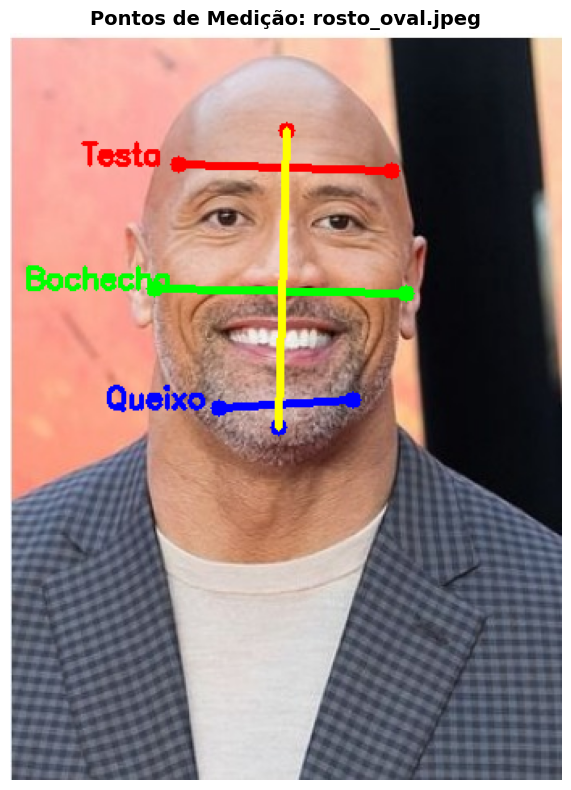

In [29]:
if len(imagens_com_face) > 0:
    # Usar primeira imagem para teste
    imagem_teste = imagens_com_face[2]
    caminho = os.path.join(pasta_imagens, imagem_teste)
    
    imagem = cv2.imread(caminho)
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    
    # Detectar landmarks
    resultados = face_mesh.process(imagem_rgb)
    
    if resultados.multi_face_landmarks:
        face_landmarks = resultados.multi_face_landmarks[0]
        
        # Calcular medidas
        medidas = calcular_medidas_faciais(face_landmarks, imagem.shape)
        
        # Mostrar medidas
        print(f"Medidas para: {imagem_teste}\n")
        print("="*50)
        print("MEDIDAS EM PIXELS:")
        print("="*50)
        print(f"Largura da Testa:      {medidas['largura_testa']:.1f} px")
        print(f"Largura da Bochecha:   {medidas['largura_bochecha']:.1f} px")
        print(f"Largura do Queixo:     {medidas['largura_queixo']:.1f} px")
        print(f"Altura Total:          {medidas['altura_total']:.1f} px")
        print(f"Largura Máxima:        {medidas['largura_maxima']:.1f} px")
        print("\n" + "="*50)
        print("PROPORÇÕES:")
        print("="*50)
        print(f"Altura / Largura Máx:  {medidas['proporcao_altura_largura']:.2f}")
        print(f"Testa / Queixo:        {medidas['proporcao_testa_queixo']:.2f}")
        print(f"Uniformidade:          {medidas['uniformidade']:.2f}")
        
        # Visualizar pontos de medição
        imagem_medidas = imagem.copy()
        pontos = medidas['pontos']
        
        # Desenhar linhas e pontos
        # Linha da testa (vermelho)
        cv2.line(imagem_medidas, pontos['testa_esquerda'], pontos['testa_direita'], (0, 0, 255), 3)
        cv2.circle(imagem_medidas, pontos['testa_esquerda'], 5, (0, 0, 255), -1)
        cv2.circle(imagem_medidas, pontos['testa_direita'], 5, (0, 0, 255), -1)
        cv2.circle(imagem_medidas, pontos['testa_central'], 5, (0, 0, 255), -1)
        
        # Linha da bochecha (verde)
        cv2.line(imagem_medidas, pontos['bochecha_esquerda'], pontos['bochecha_direita'], (0, 255, 0), 3)
        cv2.circle(imagem_medidas, pontos['bochecha_esquerda'], 5, (0, 255, 0), -1)
        cv2.circle(imagem_medidas, pontos['bochecha_direita'], 5, (0, 255, 0), -1)
        
        # Linha do queixo (azul)
        cv2.line(imagem_medidas, pontos['queixo_esquerdo'], pontos['queixo_direito'], (255, 0, 0), 3)
        cv2.circle(imagem_medidas, pontos['queixo_esquerdo'], 5, (255, 0, 0), -1)
        cv2.circle(imagem_medidas, pontos['queixo_direito'], 5, (255, 0, 0), -1)
        cv2.circle(imagem_medidas, pontos['queixo_central'], 5, (255, 0, 0), -1)
        
        # Linha da altura (amarelo)
        cv2.line(imagem_medidas, pontos['testa_central'], pontos['queixo_central'], (0, 255, 255), 3)
        
        # Adicionar texto
        cv2.putText(imagem_medidas, 'Testa', 
                   (pontos['testa_esquerda'][0]-60, pontos['testa_esquerda'][1]), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
        cv2.putText(imagem_medidas, 'Bochecha', 
                   (pontos['bochecha_esquerda'][0]-80, pontos['bochecha_esquerda'][1]), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
        cv2.putText(imagem_medidas, 'Queixo', 
                   (pontos['queixo_esquerdo'][0]-70, pontos['queixo_esquerdo'][1]), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
        
        # Visualizar
        plt.figure(figsize=(12, 8))
        plt.imshow(cv2.cvtColor(imagem_medidas, cv2.COLOR_BGR2RGB))
        plt.title(f'Pontos de Medição: {imagem_teste}', fontsize=14, fontweight='bold')
        plt.axis('off')
        plt.tight_layout()
        plt.show()


---

## 8. PASSO 5: Classificar Formato do Rosto

Baseado em literatura científica sobre análise facial, vamos classificar o rosto usando as seguintes métricas:

### **Fórmulas de Classificação:**

1. **Proporção de Aspecto (AR)**: `AR = Altura / Largura_Máxima`
2. **Índice de Afunilamento (TI)**: `TI = Largura_Testa / Largura_Queixo`
3. **Índice de Bochecha (CI)**: `CI = Largura_Bochecha / Largura_Máxima`

### **Categorias:**
- **Oval**: AR > 1.35, TI ≈ 1.0 (proporção harmônica)
- **Redondo**: AR < 1.20, larguras similares
- **Quadrado**: AR ≈ 1.0-1.20, TI ≈ 1.0, contornos uniformes
- **Triangular (Coração)**: TI > 1.05, testa mais larga que queixo


In [30]:
def classificar_formato_rosto(medidas):
    """
    Classifica o formato do rosto baseado em fórmulas científicas.
    
    Baseado em:
    - Aspect Ratio (AR) = Height / Width
    - Tapering Index (TI) = Forehead / Jawline
    - Cheekbone Index (CI) = Cheekbone / Max_Width
    
    Returns:
        str: 'Oval', 'Redondo', 'Quadrado' ou 'Triangular'
    """
    
    # === EXTRAIR MEDIDAS ===
    largura_testa = medidas['largura_testa']
    largura_bochecha = medidas['largura_bochecha']
    largura_queixo = medidas['largura_queixo']
    altura_total = medidas['altura_total']
    largura_maxima = medidas['largura_maxima']
    
    # === CALCULAR ÍNDICES ===
    
    # 1. Aspect Ratio (Proporção de Aspecto)
    AR = altura_total / largura_maxima if largura_maxima > 0 else 0
    
    # 2. Tapering Index (Índice de Afunilamento)
    TI = largura_testa / largura_queixo if largura_queixo > 0 else 0
    
    # 3. Cheekbone Index (Índice de Bochecha)
    CI = largura_bochecha / largura_maxima if largura_maxima > 0 else 0
    
    # 4. Uniformidade (similaridade entre larguras)
    diff_testa_queixo = abs(largura_testa - largura_queixo)
    uniformidade = 1 - (diff_testa_queixo / largura_maxima) if largura_maxima > 0 else 0
    
    # === LÓGICA DE CLASSIFICAÇÃO BASEADA EM LITERATURA ===
    
    # Debug info
    debug_info = {
        'AR': AR,
        'TI': TI,
        'CI': CI,
        'Uniformidade': uniformidade
    }
    
    # 1. OVAL: Rosto alongado com proporções harmônicas
    # Características: AR > 1.35, testa e queixo similares (TI ≈ 1.0)
    if AR > 1.35 and 0.95 <= TI <= 1.10:
        return "Oval"
    
    # 2. REDONDO: Altura e largura próximas, contornos suaves
    # Características: AR < 1.20, larguras similares
    if AR < 1.20:
        return "Redondo"
    
    # 3. QUADRADO: Proporcional mas com larguras muito uniformes
    # Características: AR entre 1.0-1.25, uniformidade alta (testa ≈ queixo)
    if 1.0 <= AR <= 1.25 and uniformidade >= 0.90:
        return "Quadrado"
    
    # 4. TRIANGULAR/CORAÇÃO: Testa larga, queixo estreito
    # Características: TI > 1.05 (testa maior que queixo)
    if TI > 1.05:
        return "Triangular"
    
    # === REGRAS SECUNDÁRIAS (Refinamento) ===
    
    # Se muito alongado mas não se encaixou em Oval → Oval
    if AR > 1.40:
        return "Oval"
    
    # Se testa muito menor que queixo → Triangular Invertido (classificamos como Triangular)
    if TI < 0.92:
        return "Triangular"
    
    # Se muito uniforme mas não classificado → Quadrado
    if uniformidade > 0.93:
        return "Quadrado"
    
    # === FALLBACK ===
    # Baseado em AR para decisão final
    if AR >= 1.30:
        return "Oval"
    elif AR < 1.15:
        return "Redondo"
    else:
        return "Quadrado"

print("✓ Função de classificação baseada em fórmulas científicas criada!")


✓ Função de classificação baseada em fórmulas científicas criada!


### **Metodologia Científica de Classificação**

A classificação é baseada em três índices principais extraídos de literatura científica sobre análise facial:

**1. Aspect Ratio (AR) - Proporção de Aspecto**
```
AR = Altura Total / Largura Máxima
```
- Mede o quão alongado é o rosto
- AR > 1.35: Rosto alongado (Oval)
- AR < 1.20: Rosto mais circular (Redondo)

**2. Tapering Index (TI) - Índice de Afunilamento**
```
TI = Largura Testa / Largura Queixo
```
- Mede a relação entre testa e queixo
- TI > 1.05: Testa mais larga que queixo (Triangular/Coração)
- TI ≈ 1.0: Proporções equilibradas

**3. Cheekbone Index (CI) - Índice da Bochecha**
```
CI = Largura Bochecha / Largura Máxima
```
- Indica a proeminência das bochechas
- Usado como métrica auxiliar na classificação


### Classificar Todas as Imagens

Agora vamos processar todas as imagens com faces detectadas e classificá-las.


In [31]:
# Dicionário para armazenar classificações
classificacoes = {}
medidas_todas = {}

print("="*80)
print("CLASSIFICAÇÃO DOS FORMATOS DE ROSTO - BASEADO EM FÓRMULAS CIENTÍFICAS")
print("="*80 + "\n")

for nome_imagem in imagens_com_face:
    caminho = os.path.join(pasta_imagens, nome_imagem)
    imagem = cv2.imread(caminho)
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    
    # Detectar landmarks
    resultados = face_mesh.process(imagem_rgb)
    
    if resultados.multi_face_landmarks:
        face_landmarks = resultados.multi_face_landmarks[0]
        
        # Calcular medidas
        medidas = calcular_medidas_faciais(face_landmarks, imagem.shape)
        medidas_todas[nome_imagem] = medidas
        
        # Calcular índices
        AR = medidas['altura_total'] / medidas['largura_maxima']
        TI = medidas['largura_testa'] / medidas['largura_queixo']
        CI = medidas['largura_bochecha'] / medidas['largura_maxima']
        
        # Classificar
        formato = classificar_formato_rosto(medidas)
        classificacoes[nome_imagem] = formato
        
        # Mostrar resultado detalhado
        print(f"📷 {nome_imagem}")
        print(f"   ✓ Formato detectado: {formato.upper()}")
        print(f"   • AR (Aspect Ratio):      {AR:.3f}")
        print(f"   • TI (Tapering Index):    {TI:.3f}")
        print(f"   • CI (Cheekbone Index):   {CI:.3f}")
        print(f"   • Larguras: Testa={medidas['largura_testa']:.0f} px, "
              f"Bochecha={medidas['largura_bochecha']:.0f} px, "
              f"Queixo={medidas['largura_queixo']:.0f} px")
        print()

print("="*80)
print(f"✓ Total classificado: {len(classificacoes)} imagens")
print("="*80)


CLASSIFICAÇÃO DOS FORMATOS DE ROSTO - BASEADO EM FÓRMULAS CIENTÍFICAS

📷 rosto_quadrado.jpeg
   ✓ Formato detectado: REDONDO
   • AR (Aspect Ratio):      1.173
   • TI (Tapering Index):    1.596
   • CI (Cheekbone Index):   1.000
   • Larguras: Testa=215 px, Bochecha=254 px, Queixo=135 px

📷 rosto_triangular.jpeg
   ✓ Formato detectado: TRIANGULAR
   • AR (Aspect Ratio):      1.241
   • TI (Tapering Index):    1.666
   • CI (Cheekbone Index):   1.000
   • Larguras: Testa=368 px, Bochecha=426 px, Queixo=221 px

📷 rosto_oval.jpeg
   ✓ Formato detectado: REDONDO
   • AR (Aspect Ratio):      1.180
   • TI (Tapering Index):    1.588
   • CI (Cheekbone Index):   1.000
   • Larguras: Testa=132 px, Bochecha=156 px, Queixo=83 px

📷 rosto_redondo.jpeg
   ✓ Formato detectado: REDONDO
   • AR (Aspect Ratio):      1.165
   • TI (Tapering Index):    1.772
   • CI (Cheekbone Index):   1.000
   • Larguras: Testa=211 px, Bochecha=242 px, Queixo=119 px

✓ Total classificado: 4 imagens


### Visualizar Resultados da Classificação

Vamos criar uma visualização final com todas as imagens e suas classificações.


KeyError: 'zigoma_esquerdo'

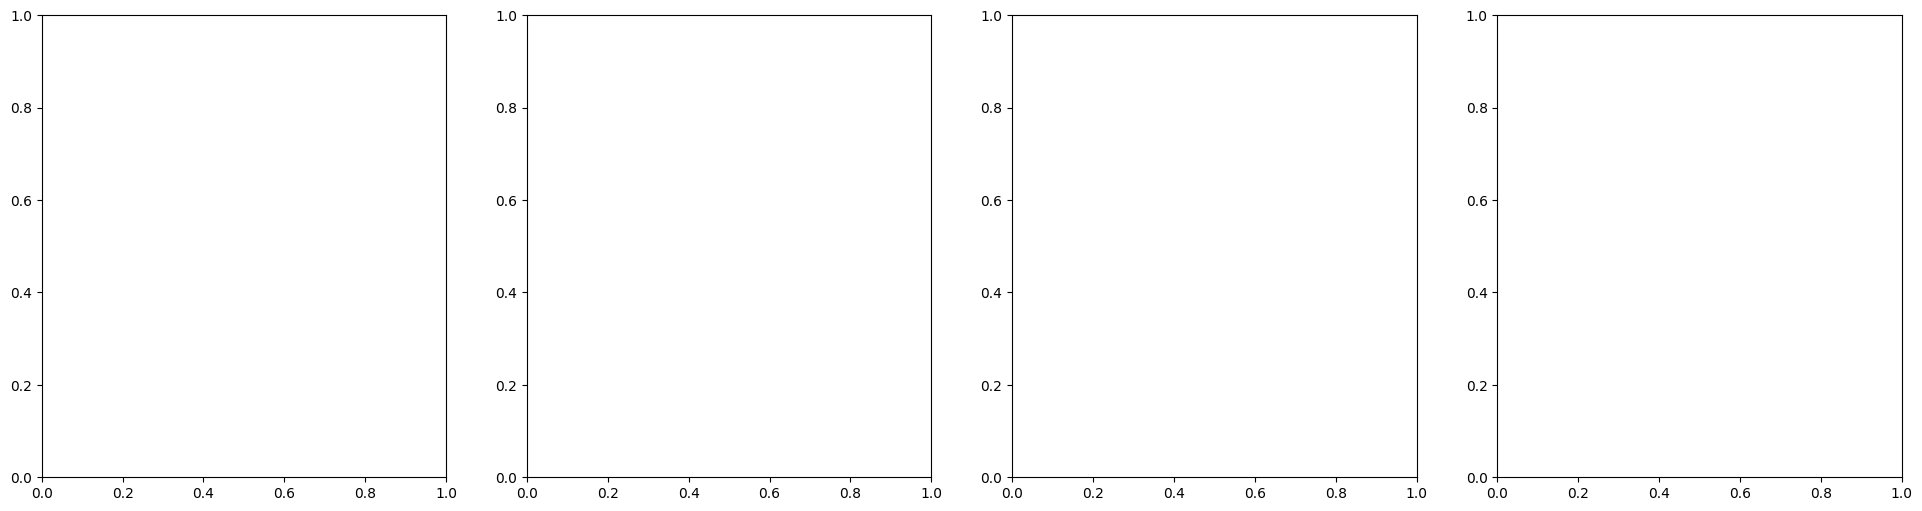

In [32]:
if len(classificacoes) > 0:
    # Cores para cada formato
    cores_formato = {
        'Triangular': '#FF6B6B',  # Vermelho
        'Redondo': '#4ECDC4',     # Turquesa
        'Quadrado': '#FFE66D',    # Amarelo
        'Oval': '#95E1D3'         # Verde água
    }
    
    # Criar visualização
    num_imgs = len(classificacoes)
    fig, axes = plt.subplots(1, num_imgs, figsize=(6*num_imgs, 6))
    
    if num_imgs == 1:
        axes = [axes]
    
    for idx, (nome_imagem, formato) in enumerate(classificacoes.items()):
        caminho = os.path.join(pasta_imagens, nome_imagem)
        imagem = cv2.imread(caminho)
        imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
        
        # Detectar landmarks novamente
        resultados = face_mesh.process(imagem_rgb)
        
        if resultados.multi_face_landmarks:
            face_landmarks = resultados.multi_face_landmarks[0]
            medidas = medidas_todas[nome_imagem]
            pontos = medidas['pontos']
            
            # Desenhar pontos de medição
            imagem_final = imagem.copy()
            
            # Desenhar linhas de medição
            cv2.line(imagem_final, pontos['testa_esquerda'], pontos['testa_direita'], (0, 0, 255), 2)
            cv2.line(imagem_final, pontos['zigoma_esquerdo'], pontos['zigoma_direito'], (0, 255, 0), 2)
            cv2.line(imagem_final, pontos['mandibula_esquerda'], pontos['mandibula_direita'], (255, 0, 0), 2)
            cv2.line(imagem_final, pontos['topo_cabeca'], pontos['queixo'], (0, 255, 255), 2)
            
            # Mostrar imagem
            axes[idx].imshow(cv2.cvtColor(imagem_final, cv2.COLOR_BGR2RGB))
            
            # Título com formato
            cor = cores_formato.get(formato, '#FFFFFF')
            axes[idx].set_title(f'{formato.upper()}\n{nome_imagem}', 
                               fontsize=14, fontweight='bold', 
                               color=cor, pad=10,
                               bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor=cor, linewidth=3))
            axes[idx].axis('off')
    
    plt.suptitle('Classificação de Formatos de Rosto', fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()
    
    # Resumo estatístico
    print("\n" + "="*60)
    print("RESUMO DAS CLASSIFICAÇÕES")
    print("="*60)
    
    from collections import Counter
    contagem = Counter(classificacoes.values())
    
    for formato, quantidade in contagem.items():
        print(f"{formato}: {quantidade} imagem(ns)")
    
    print("="*60)


### Tabela Comparativa de Medidas

Vamos criar uma tabela com todas as medidas para comparação.


---

## 💡 **Referência do Artigo Científico**

**Artigo**: "An Approach to Face Shape Classification for Hairstyle Recommendation"  
**Autores**: Wisuwat Sunhem & Kitsuchart Pasupa (2016)  
**Fonte**: IEEE 8th International Conference on Advanced Computational Intelligence

### **Features Extraídas do Artigo:**

O artigo usa **19 features discriminativas** baseadas em landmarks faciais:

| Feature | Descrição | Fórmula |
|---------|-----------|---------|
| f1 | Ratio altura/largura | `height / width` |
| f2 | Ratio mandíbulas/largura | `jaw_distance / width` |
| f3 | Ratio queixo-boca/mandíbulas | `chin_mouth / jaw_distance` |
| f4-f11 | Ângulos lado direito | `tan⁻¹((px - chin_x) / (py - chin_y))` |
| f12-f19 | Ângulos lado esquerdo | `tan⁻¹((px - chin_x) / (py - chin_y))` |

**Resultado**: SVM-RBF alcançou **72% de acurácia** com 5 categorias (Round, Oval, Oblong, Square, Heart)


In [ ]:
if len(classificacoes) > 0:
    print("\n" + "="*110)
    print("TABELA COMPARATIVA DE ÍNDICES E MEDIDAS")
    print("="*110)
    
    # Cabeçalho
    print(f"\n{'Imagem':<25} {'Formato':<12} {'AR':<8} {'TI':<8} {'CI':<8} {'Testa':<8} {'Bochecha':<10} {'Queixo':<8}")
    print("-"*110)
    
    # Dados
    for nome_imagem, formato in classificacoes.items():
        medidas = medidas_todas[nome_imagem]
        AR = medidas['altura_total'] / medidas['largura_maxima']
        TI = medidas['largura_testa'] / medidas['largura_queixo']
        CI = medidas['largura_bochecha'] / medidas['largura_maxima']
        
        print(f"{nome_imagem:<25} {formato:<12} "
              f"{AR:<8.3f} "
              f"{TI:<8.3f} "
              f"{CI:<8.3f} "
              f"{medidas['largura_testa']:<8.0f} "
              f"{medidas['largura_bochecha']:<10.0f} "
              f"{medidas['largura_queixo']:<8.0f}")
    
    print("="*110)
    
    print("\n📊 Legenda dos Índices:")
    print("  • AR (Aspect Ratio): Proporção Altura/Largura")
    print("  • TI (Tapering Index): Índice de Afunilamento (Testa/Queixo)")
    print("  • CI (Cheekbone Index): Índice da Bochecha (Bochecha/Largura_Max)")



TABELA COMPARATIVA DE MEDIDAS

Imagem                    Formato      Alt/Larg   Test/Mand   Testa    Zigoma   Mandíb  
----------------------------------------------------------------------------------------------------
rosto_quadrado.jpeg       Oval         1.27       1.12        237      255      212     
rosto_triangular.jpeg     Oval         1.33       1.17        407      432      349     
rosto_oval.jpeg           Oval         1.28       1.12        145      157      130     
rosto_redondo.jpeg        Oval         1.26       1.18        232      246      196     


---

## 9. Finalizar


In [ ]:
# Fechar recursos
face_mesh.close()
print("✓ Processamento finalizado. Recursos liberados!")
